<table>
    <tr>
        <td>
            <img src="IISERB_new_logo_updated_2022.png" alt="Institute Logo" width="100">
        </td>
        <td>
            <center>
            <h1><b>Data Science in Practice - DSE 315</b></h1>
            </center>
            <h2><b>Predict Wine Quality using Machine learning with Python</b></h2>
            <center>
            <h4><b>Nikunj Indoriya[22221], Aditya Dandhare[22019]</b></h4>
            </center>
        </td>
    </tr>
</table>

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Step 1: Read the CSV files into DataFrames
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')

# Step 2: Combine the DataFrames row-wise (assuming they have the same number of rows)
wine_train_df = pd.concat([x_train, y_train], axis=1)

# Step 3: Save the combined DataFrame to a new CSV file (if needed)
wine_train_df.to_csv('wine_train.csv', index=False)

# Display the combined DataFrame
wine_train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
1,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
2,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
3,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
4,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5


In [3]:
wine_train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
1,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
2,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
3,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
4,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5


In [4]:
wine_train_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Data Wrangling

In [5]:
wine_train_df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


This dataset features are already present in desired data types.

In [6]:
wine_train_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.323690,0.530559,0.272471,2.555473,0.088448,15.876075,46.657154,0.996774,3.311650,0.660023,10.418100,5.623925
std,1.724243,0.179275,0.195448,1.435790,0.049332,10.313517,32.941962,0.001856,0.154016,0.174605,1.052694,0.806909
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000,3.000000
25%,7.100000,0.400000,0.100000,1.900000,0.071000,7.000000,22.000000,0.995655,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The describe function is used to get the descriptive statistics of the dataset.

In [7]:
wine_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1279 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free sulfur dioxide   1279 non-null   float64
 6   total sulfur dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
 11  quality               1279 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 120.0 KB


In [8]:
wine_train_df.isnull().sum()
# This function is used to calculate the no. of null values.

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


As the above output suggests, the available dataset has no missing/null values.

If the null value appeared, we would have used the dropna function to remove the null values or would have used statistical measure to replace with missing values.

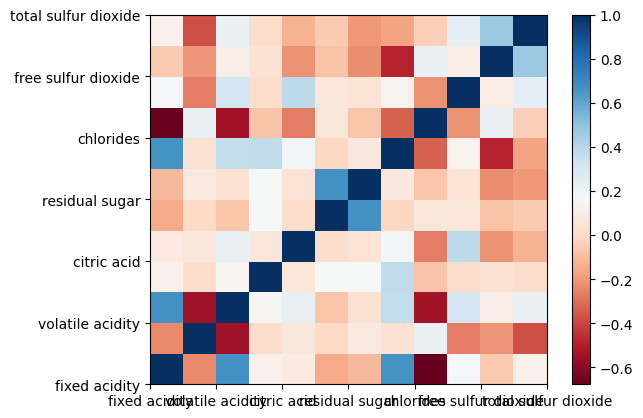

In [9]:
# Covarience matrix
def covmax(wine_train_df):
    cov_mat = wine_train_df.corr(method = 'pearson')
    fig = plt.figure().add_subplot(111)
    plt.pcolor(cov_mat, cmap = 'RdBu')
    plt.colorbar()
    fig.set_xticklabels(wine_train_df.columns)
    fig.set_yticklabels(wine_train_df.columns)
    plt.show()

covmax(wine_train_df)

In [10]:
# Add a column 'quality_mark'
def add_categ_quality(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]

    low['quality_mark'] = 'low'
    medium['quality_mark'] = 'medium'
    high['quality_mark'] = 'high'

    frames = [low, medium, high]
    return pd.concat(frames)

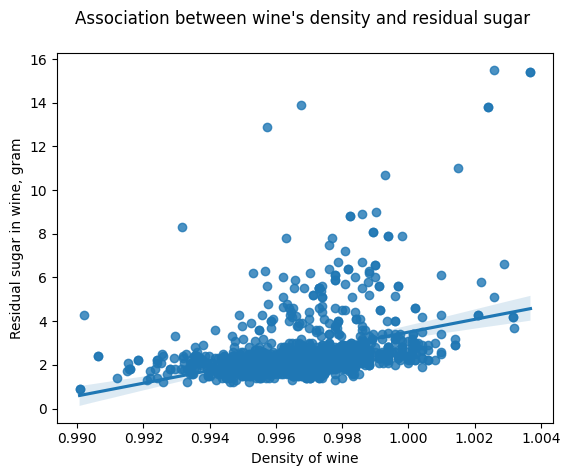

PearsonRResult(statistic=0.3773772338519718, pvalue=1.4719730549925598e-44)


In [11]:
def pearson(wine_set):
    scat1 = seaborn.regplot(x = "density", y = "residual sugar", fit_reg = True, data = wine_set)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar \n")
    plt.show()

    print(scipy.stats.pearsonr(wine_set['density'], wine_set["residual sugar"]))

pearson(wine_train_df)

association between wine`s density and residual sugar for wines 
of `low` quality
PearsonRResult(statistic=0.41076094209885755, pvalue=6.006378891928445e-26)

of `medium` quality
PearsonRResult(statistic=0.3618863514630835, pvalue=6.042496302165953e-22)

of `high` quality
PearsonRResult(statistic=0.6411417536357461, pvalue=0.018198707418557634)


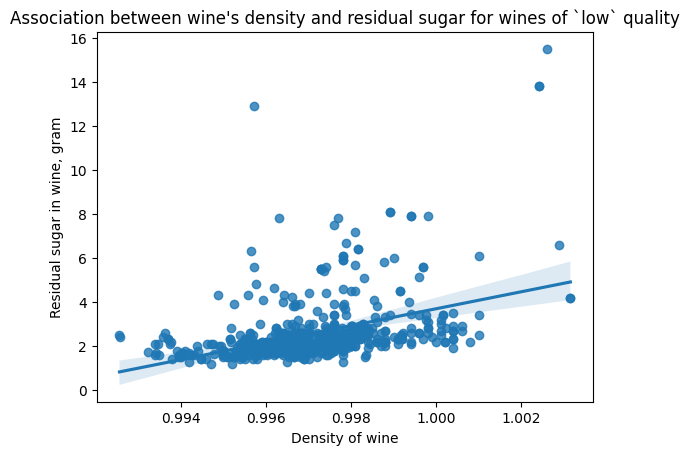

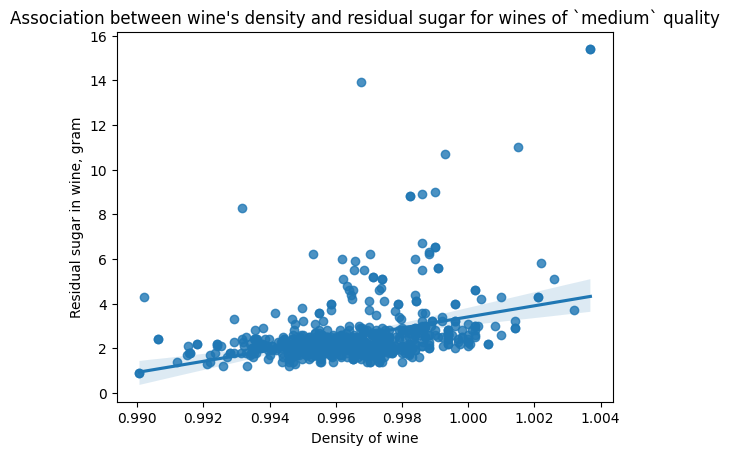

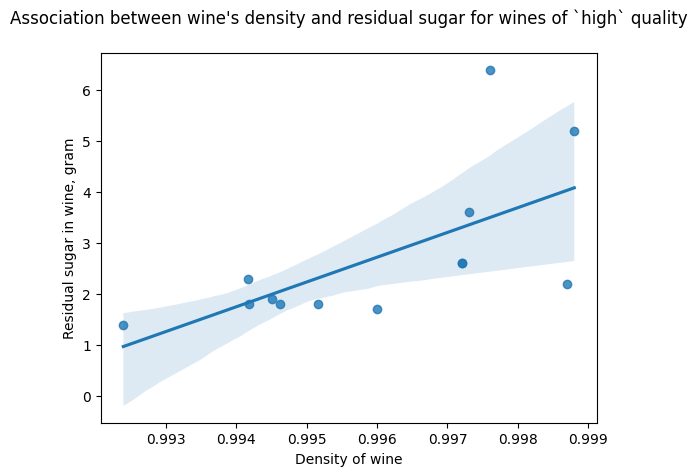

In [12]:
# Exploring Statistical Interactions
def explore(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]

    print('association between wine`s density and residual sugar for wines \nof `low` quality')
    print(scipy.stats.pearsonr(low['density'], low["residual sugar"]))
    print('\nof `medium` quality')
    print(scipy.stats.pearsonr(medium['density'], medium["residual sugar"]))
    print('\nof `high` quality')
    print(scipy.stats.pearsonr(high['density'], high["residual sugar"]))

    scat0 = seaborn.regplot(x="density", y="residual sugar", fit_reg=True, data=low)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `low` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual sugar", fit_reg=True, data=medium)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `medium` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual sugar", fit_reg=True, data=high)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `high` quality\n")
    plt.show()

explore(wine_train_df)

## Data Exploration

In [13]:
# print frequency distributions of wines' quality
def frequencyDists(wine_set):
    print("This is the frequency distribution of the wines' quality.")
    print(wine_set.groupby("quality").size()*100 / len(wine_set))
    print()

frequencyDists(wine_train_df)

This is the frequency distribution of the wines' quality.
quality
3     0.703675
4     3.362002
5    43.080532
6    39.562158
7    12.275215
8     1.016419
dtype: float64



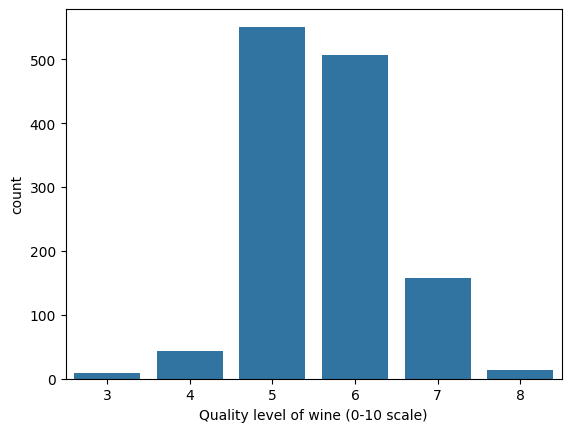

In [14]:
# Visualization  with countplots and factorplots
def countplots(wine_set):
    wine_set["quality"] = pd.Categorical(wine_set["quality"])
    seaborn.countplot(x="quality", data=wine_set)
    plt.xlabel("Quality level of wine (0-10 scale)")
    plt.show()

countplots(wine_train_df)

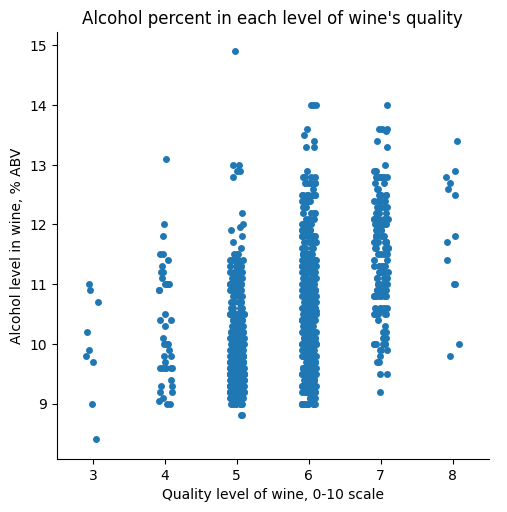

In [15]:
def factorplots(wine_set):
    seaborn.catplot(x="quality", y="alcohol", data=wine_set, kind="strip")
    plt.xlabel("Quality level of wine, 0-10 scale")
    plt.ylabel("Alcohol level in wine, % ABV")
    plt.title("Alcohol percent in each level of wine's quality")
    plt.show()

factorplots(wine_train_df)

<Axes: xlabel='quality', ylabel='Count'>

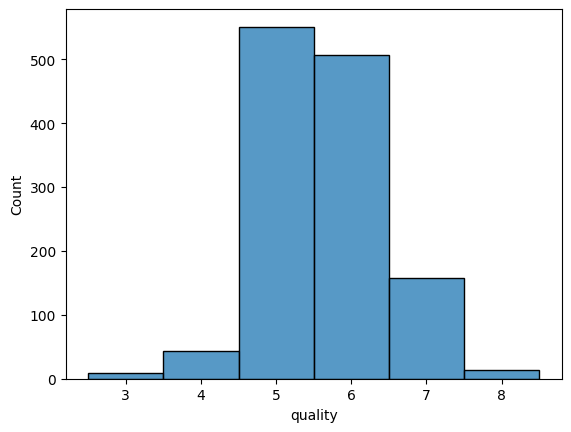

In [16]:
seaborn.histplot(x='quality', data=wine_train_df)

Text(0.5, 1.0, 'Alcohol content v/s Frequency')

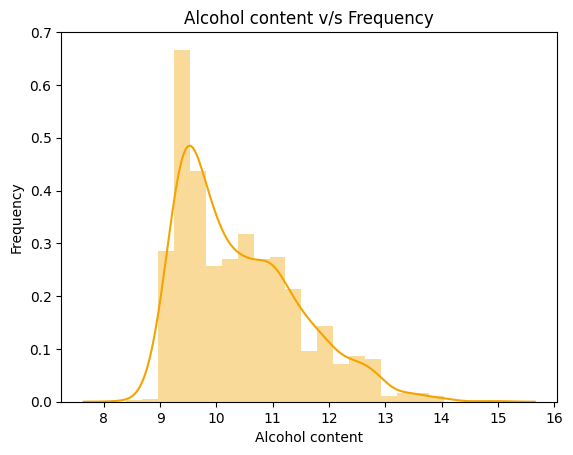

In [17]:
seaborn.distplot(wine_train_df['alcohol'], color='#F4A300')
plt.xlabel('Alcohol content')
plt.ylabel('Frequency')
plt.title('Alcohol content v/s Frequency')

,0
fixed acidity,"Axes(0.125,0.712609;0.227941x0.167391)"
volatile acidity,"Axes(0.398529,0.712609;0.227941x0.167391)"
citric acid,"Axes(0.672059,0.712609;0.227941x0.167391)"
residual sugar,"Axes(0.125,0.511739;0.227941x0.167391)"
chlorides,"Axes(0.398529,0.511739;0.227941x0.167391)"
free sulfur dioxide,"Axes(0.672059,0.511739;0.227941x0.167391)"
total sulfur dioxide,"Axes(0.125,0.31087;0.227941x0.167391)"
density,"Axes(0.398529,0.31087;0.227941x0.167391)"
pH,"Axes(0.672059,0.31087;0.227941x0.167391)"
sulphates,"Axes(0.125,0.11;0.227941x0.167391)"


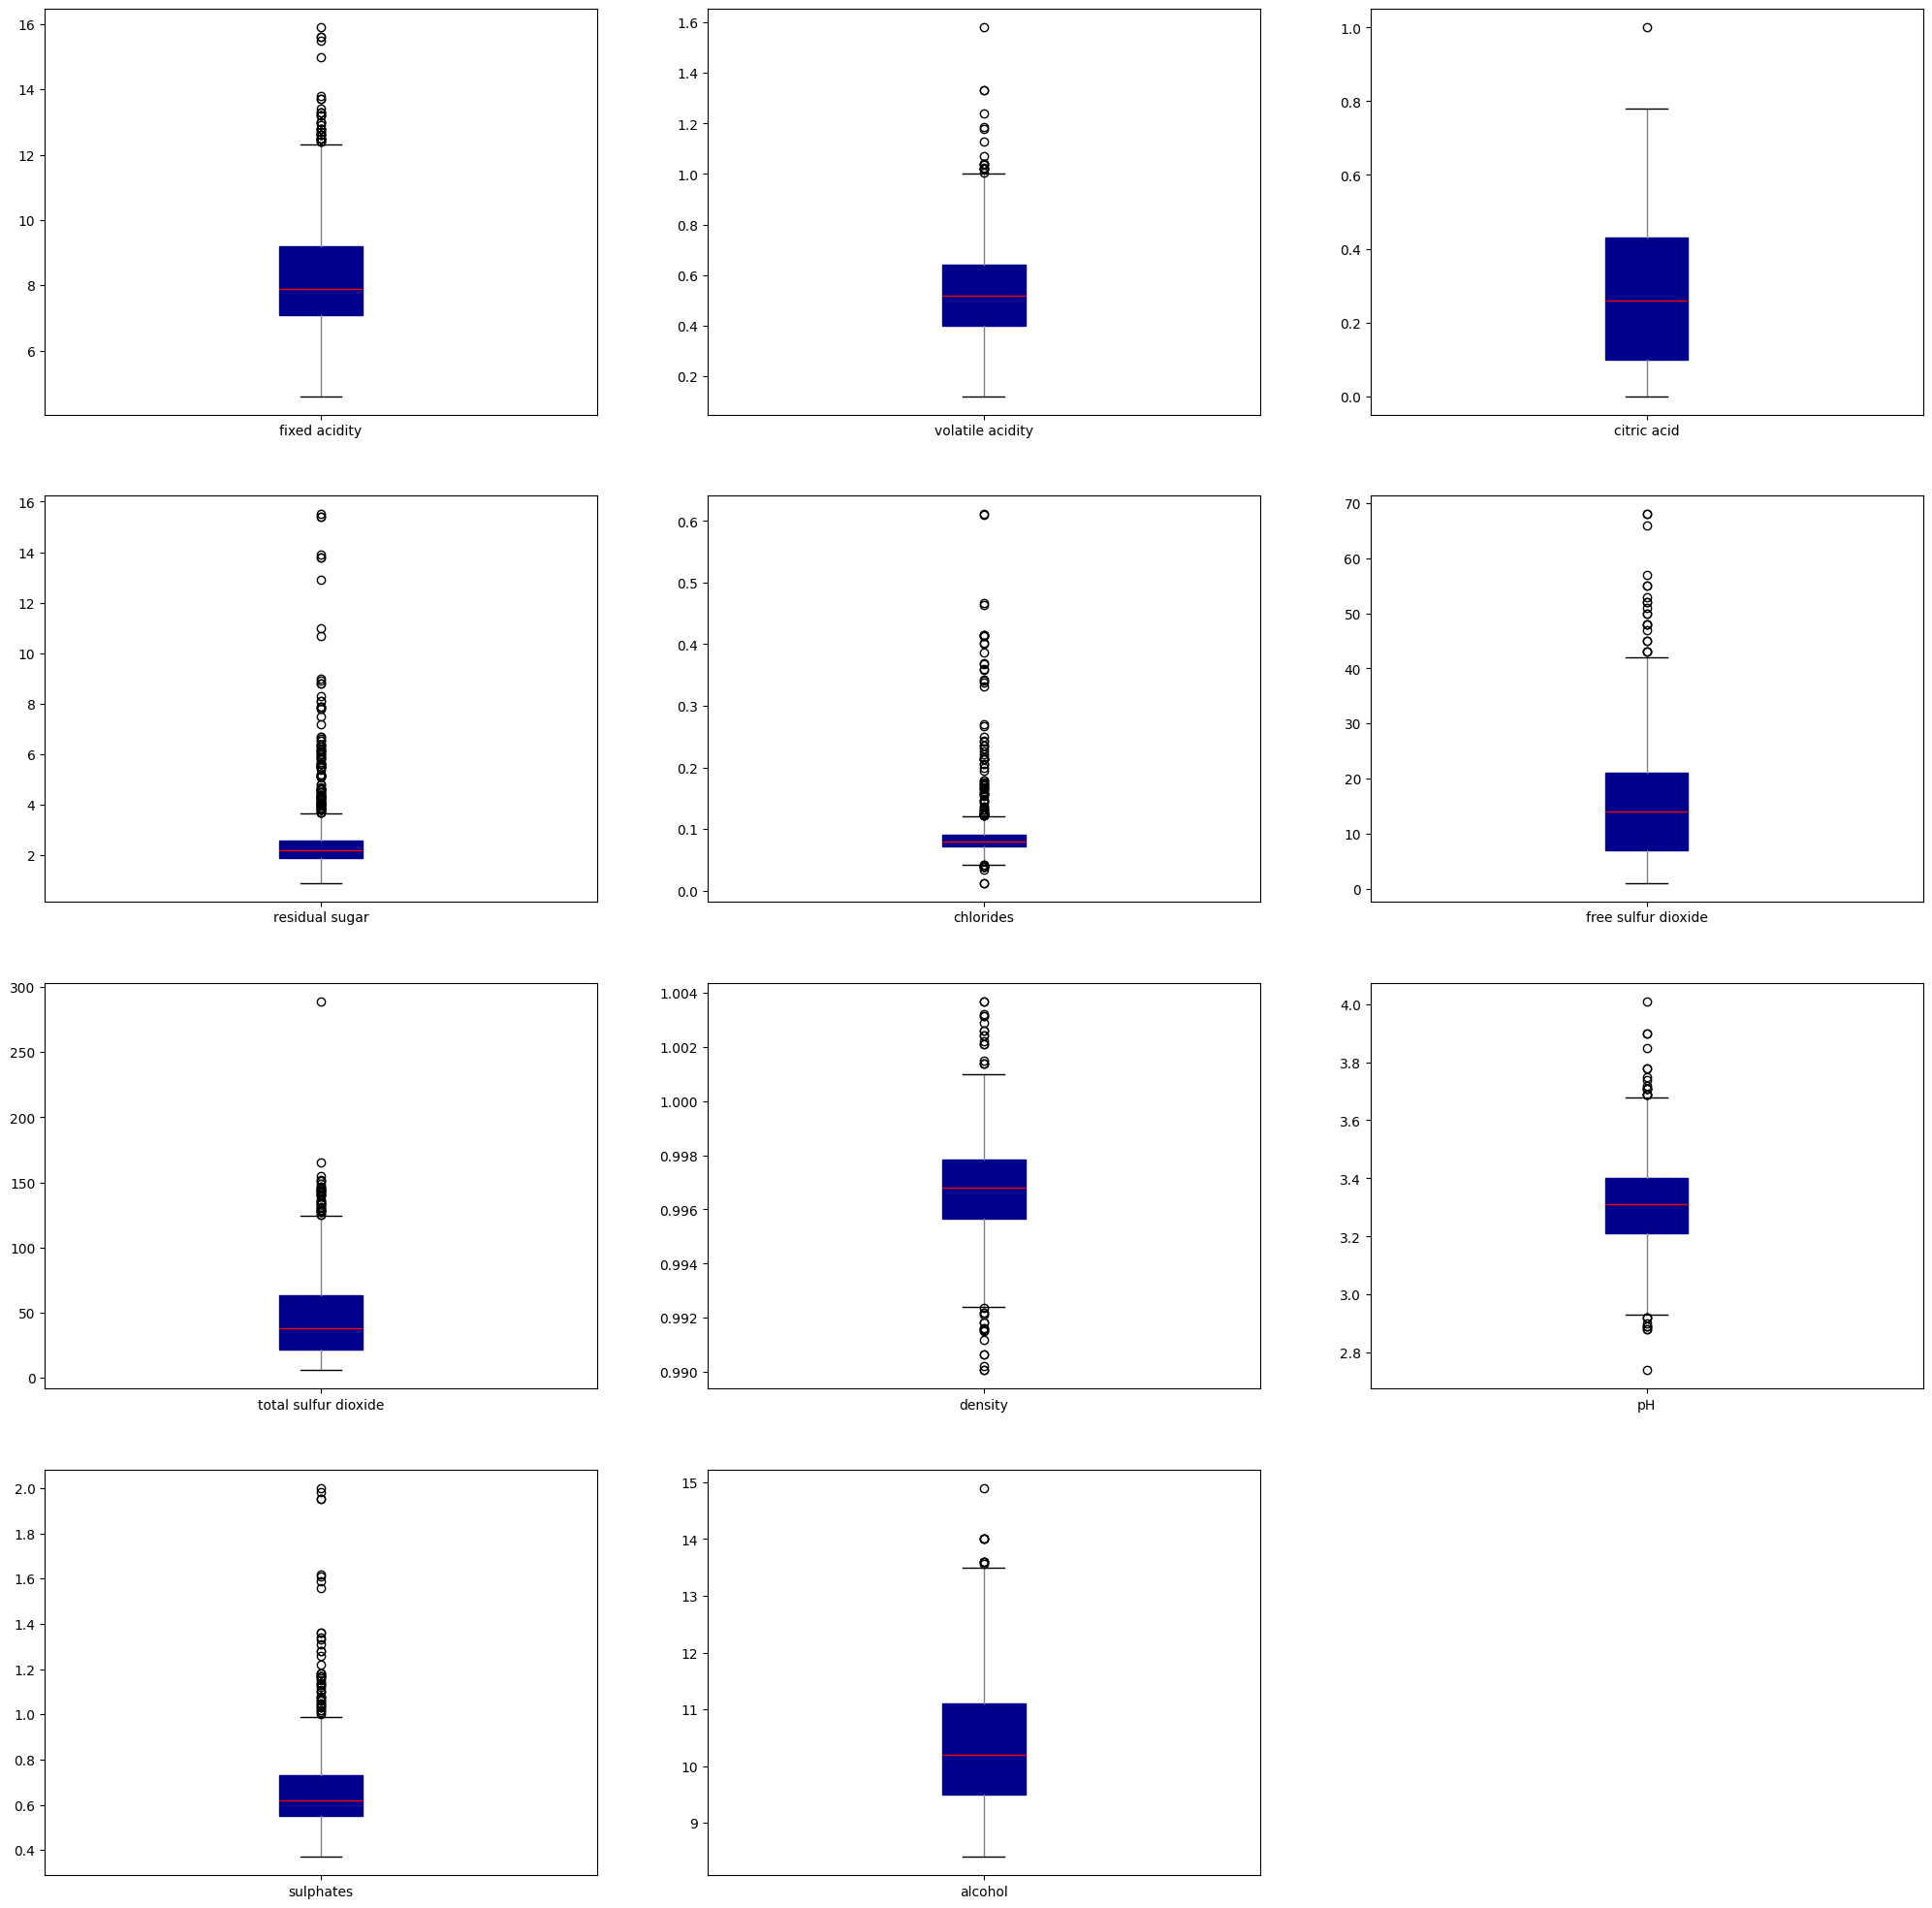

In [18]:
wine_train_df.plot(kind='box',subplots=True,layout=(4,3),sharex=False,sharey=False,figsize=(25,25),color=dict(boxes='DarkBlue', whiskers='Gray', medians='Red', caps='Black'),patch_artist=True)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

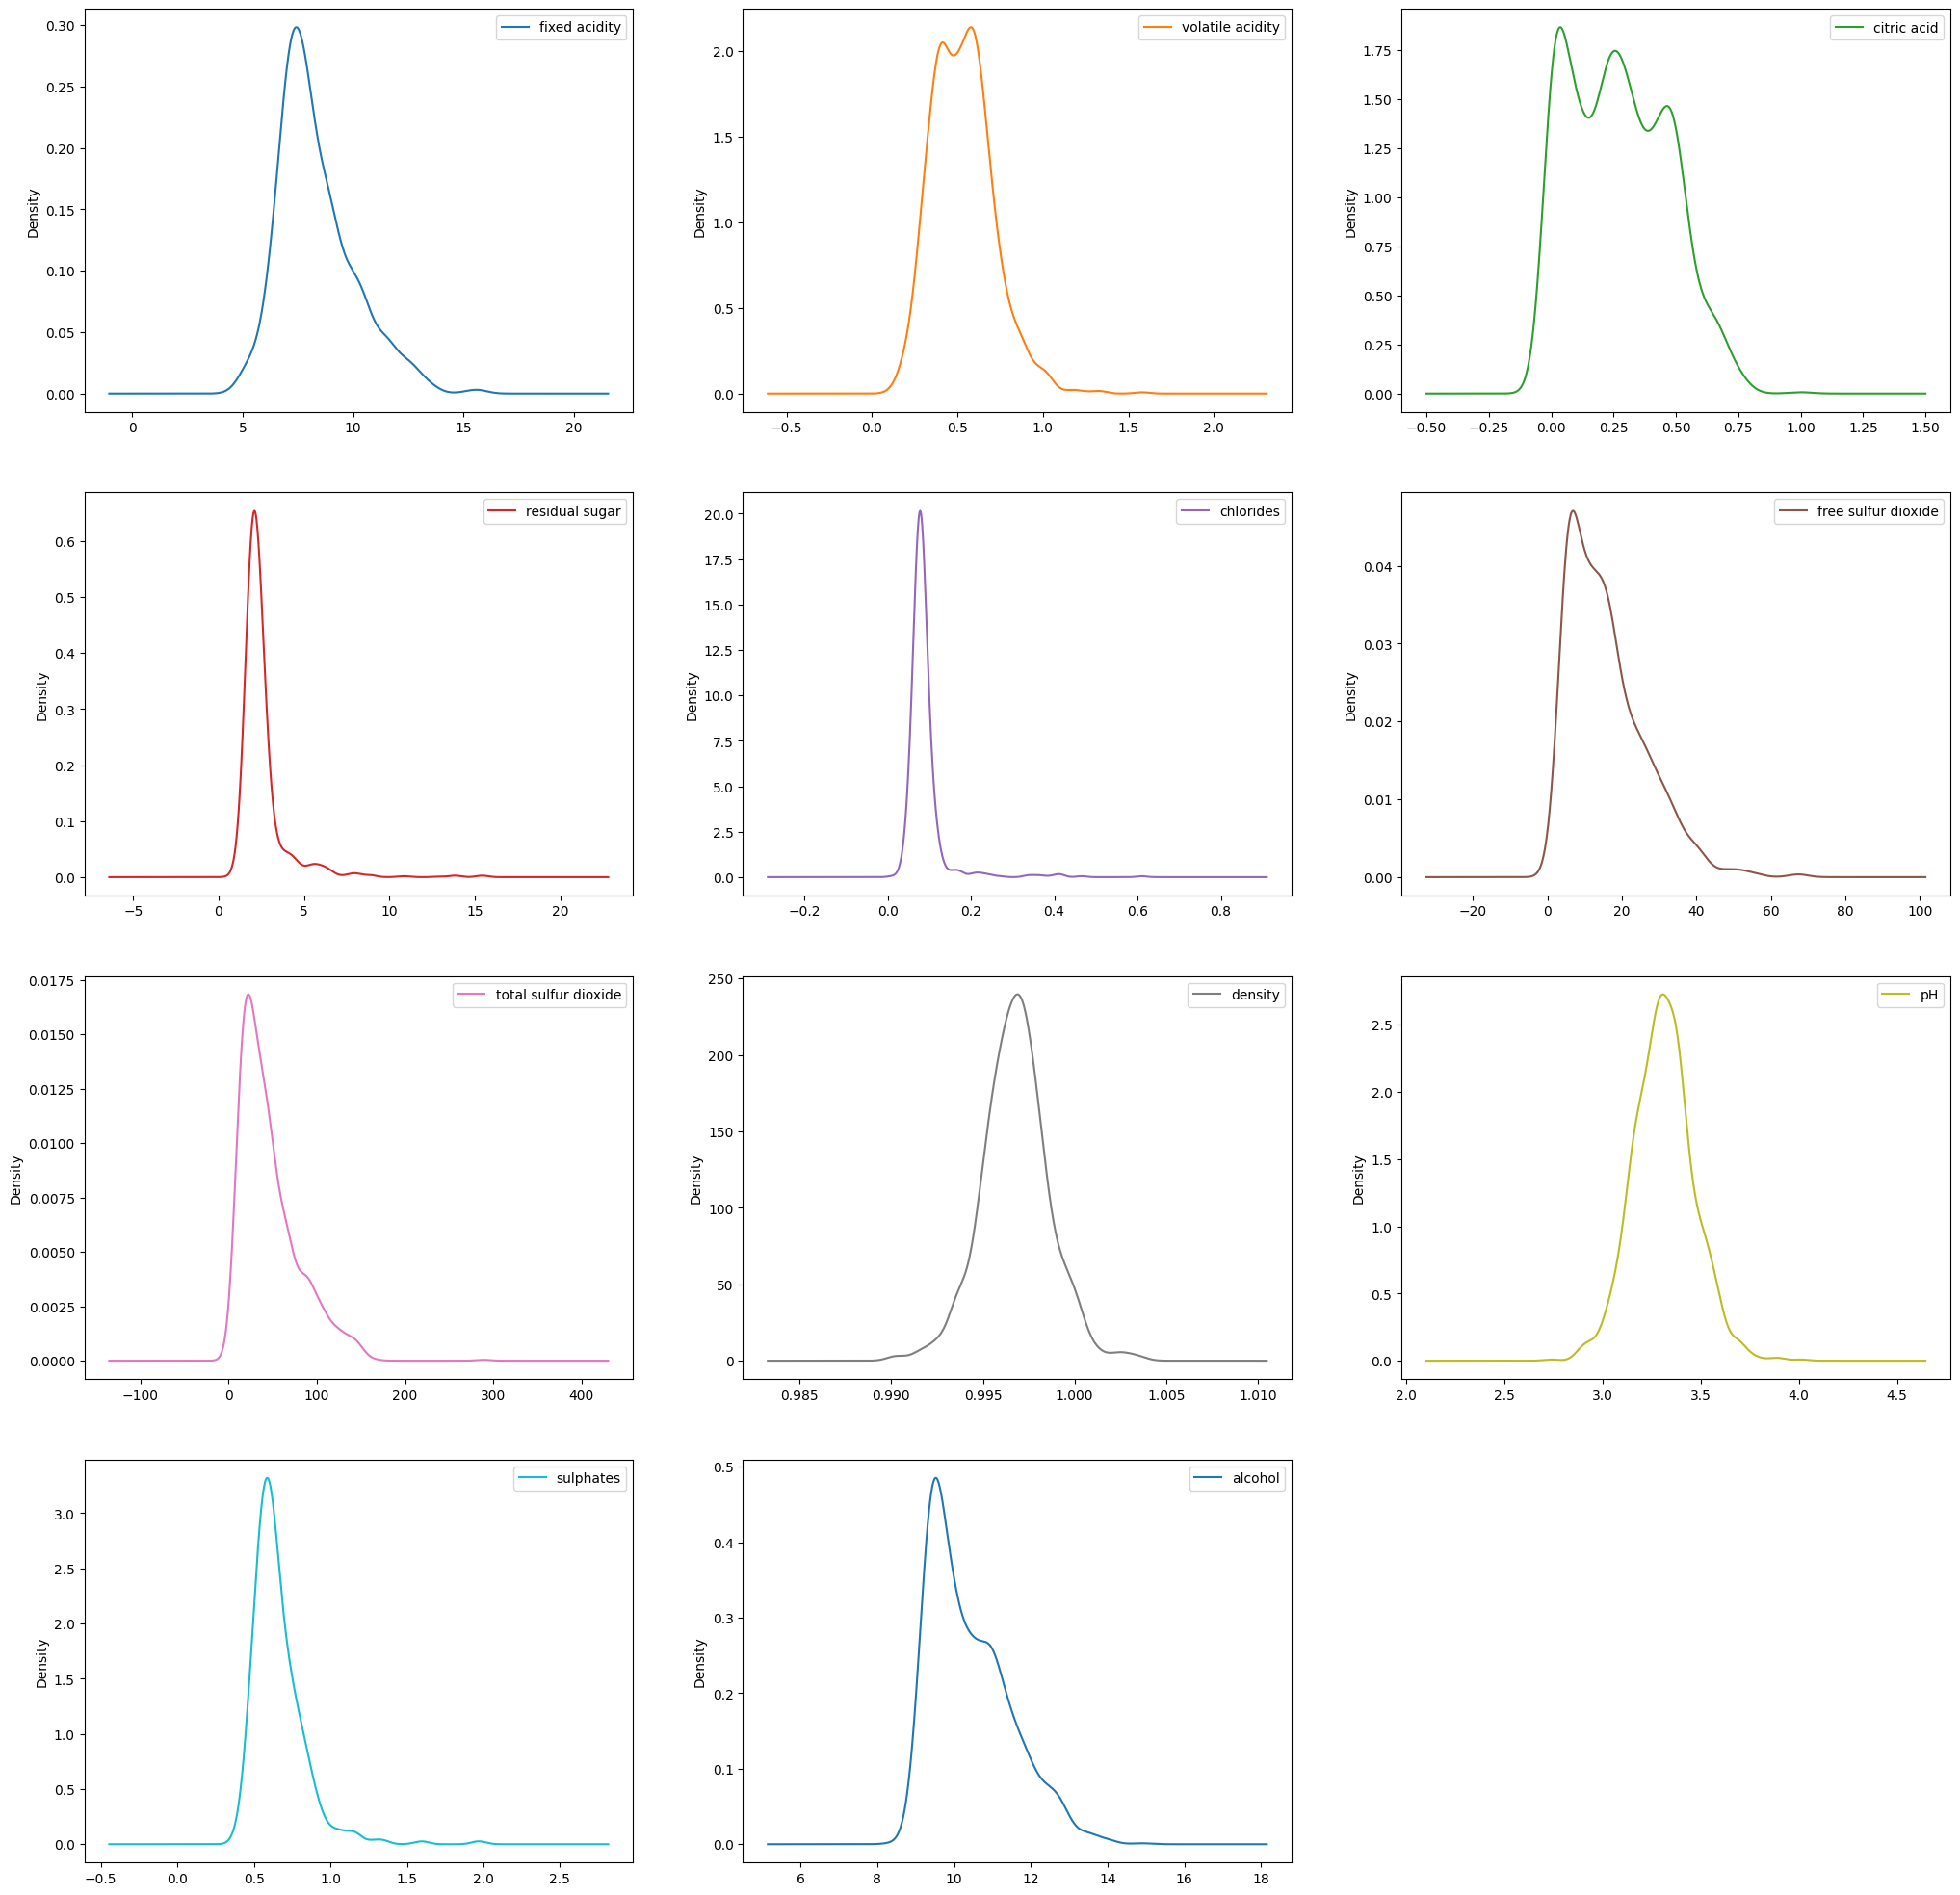

In [19]:
wine_train_df.plot(kind='density',subplots=True,layout=(4,3),figsize=(25,25),sharex=False,sharey=False)

Text(0.5, 1.0, 'Distribution of alcohol for a specific quality level')

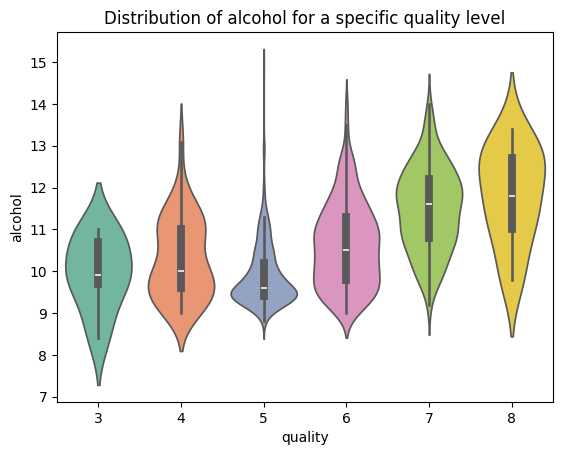

In [20]:
seaborn.violinplot(x='quality',y='alcohol',data= wine_train_df,palette='Set2')
plt.title('Distribution of alcohol for a specific quality level')

## Model Building

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import time
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Logistic Regression

----------------Logistic Regression------------------------

Performance Metrics Table:

+---+-----------+--------------------+
|   |  Metric   |       Value        |
+---+-----------+--------------------+
| 0 | Accuracy  |    0.716796875     |
| 1 | Precision | 0.7352941176470589 |
| 2 |  Recall   | 0.6809338521400778 |
| 3 | F1 Score  | 0.7070707070707071 |
| 4 |   RMSE    | 0.5321683239352001 |
+---+-----------+--------------------+


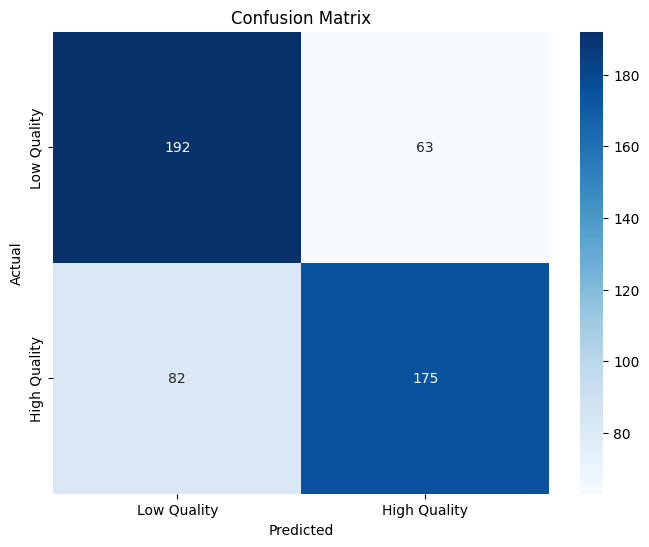

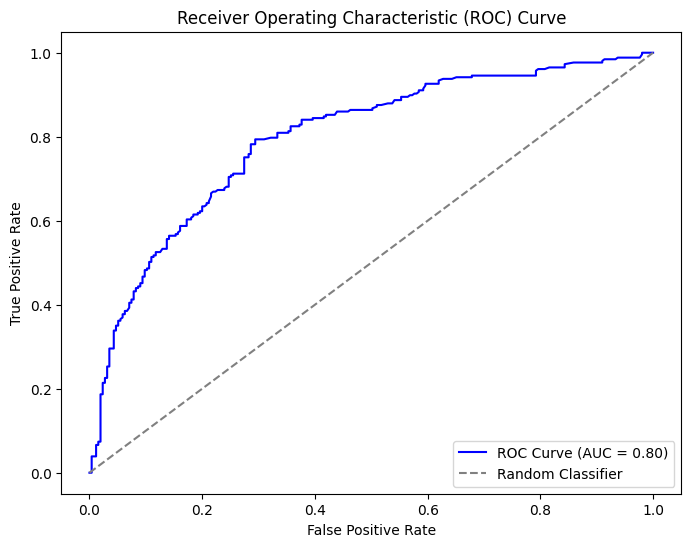

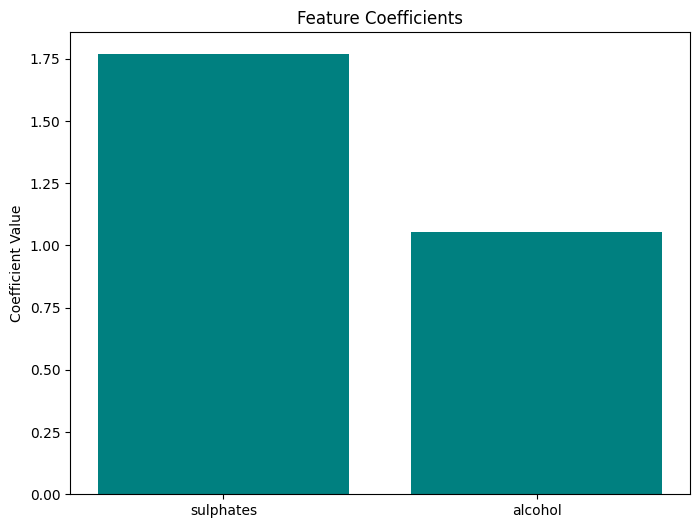

In [32]:
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    roc_curve,
    auc,
)

def log_regression(wine_set):

    w = wine_set


    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)


    predictors = wine_set[["sulphates", "alcohol"]]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=0.4, random_state=42)


    classifier = LogisticRegression()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    prob_predictions = classifier.predict_proba(pred_test)[:, 1]  # Probabilities for ROC curve

    accuracy = accuracy_score(tar_test, predictions)
    precision = precision_score(tar_test, predictions)
    recall = recall_score(tar_test, predictions)
    f1 = f1_score(tar_test, predictions)
    rmse = mean_squared_error(predictions, tar_test) ** 0.5

    metrics_df = pd.DataFrame(
        {
            "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "RMSE"],
            "Value": [accuracy, precision, recall, f1, rmse],
        }
    )

    tabular_format = tabulate(metrics_df, headers="keys", tablefmt="pretty")
    print("\nPerformance Metrics Table:\n")
    print(tabular_format)


    cm = confusion_matrix(tar_test, predictions)


    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Quality', 'High Quality'], yticklabels=['Low Quality', 'High Quality'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


    fpr, tpr, _ = roc_curve(tar_test, prob_predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    coefficients = classifier.coef_[0]
    feature_names = predictors.columns

    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, coefficients, color='teal')
    plt.title('Feature Coefficients')
    plt.ylabel('Coefficient Value')
    plt.show()

print('----------------Logistic Regression------------------------')
log_regression(wine_train_df)


## Decision Tree

----------------Decision Tree------------------------

Performance Metrics Table:

+---+-----------+--------------------+
|   |  Metric   |       Value        |
+---+-----------+--------------------+
| 0 | Accuracy  |      0.65625       |
| 1 | Precision |        0.68        |
| 2 |  Recall   | 0.5953307392996109 |
| 3 | F1 Score  | 0.6348547717842323 |
| 4 |   RMSE    | 0.5863019699779287 |
+---+-----------+--------------------+


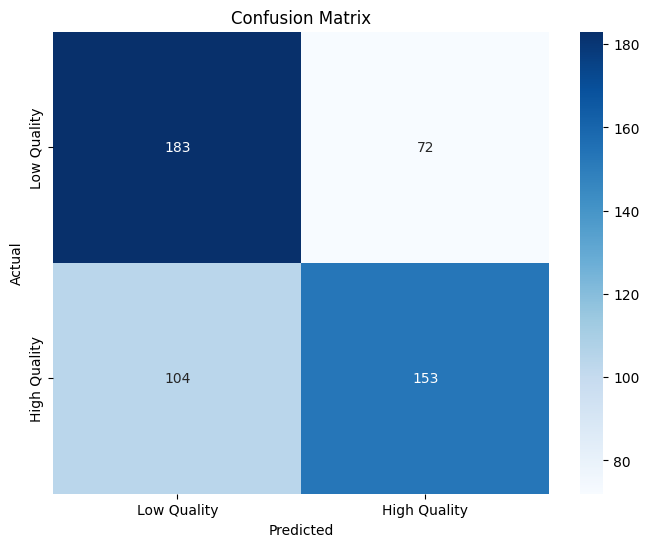

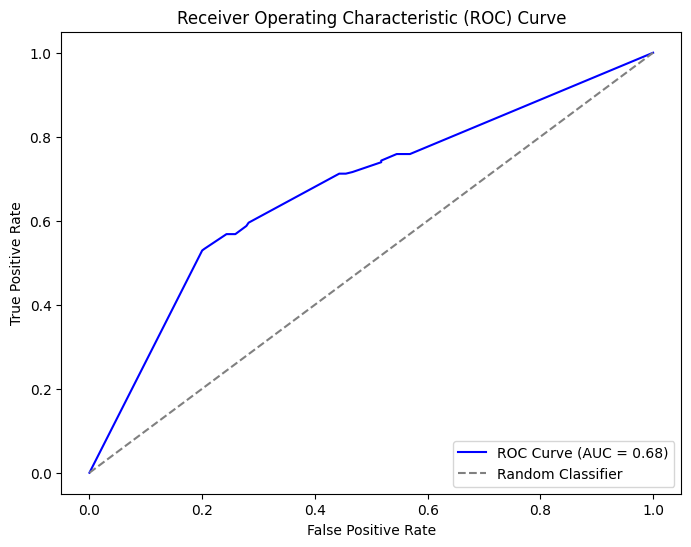

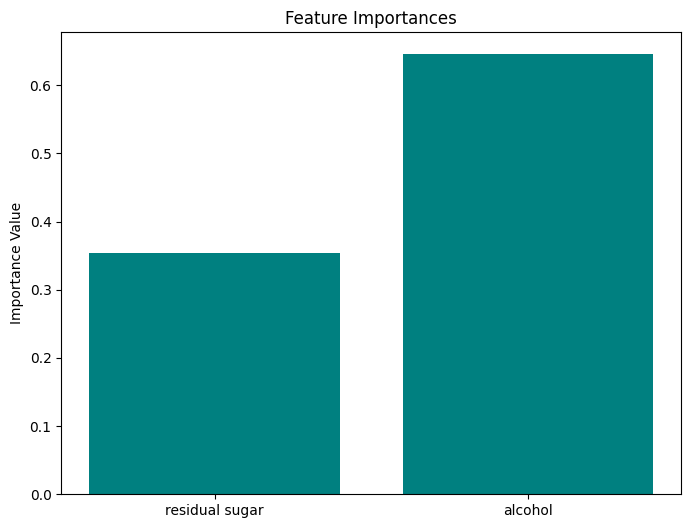

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    roc_curve,
    auc,
)
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def decis_tree(wine_set):
    # Recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # Split into training and testing sets
    predictors = wine_set[["residual sugar", "alcohol"]]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(
        predictors, targets, test_size=0.4, random_state=42
    )

    # Build model on training data
    classifier = DecisionTreeClassifier(random_state=42)
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    prob_predictions = classifier.predict_proba(pred_test)[:, 1]  # Probabilities for ROC curve

    # Compute metrics
    accuracy = accuracy_score(tar_test, predictions)
    precision = precision_score(tar_test, predictions)
    recall = recall_score(tar_test, predictions)
    f1 = f1_score(tar_test, predictions)
    rmse = mean_squared_error(predictions, tar_test) ** 0.5

    # Convert metrics into a DataFrame with index
    metrics_df = pd.DataFrame(
        {
            "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "RMSE"],
            "Value": [accuracy, precision, recall, f1, rmse],
        }
    )
    metrics_df.index = range(len(metrics_df))  # Add indexes 0, 1, 2, ...

    # Convert DataFrame to Tabular Format
    tabular_format = tabulate(metrics_df, headers="keys", tablefmt="pretty", showindex=True)
    print("\nPerformance Metrics Table:\n")
    print(tabular_format)

    # Confusion Matrix
    cm = confusion_matrix(tar_test, predictions)

    # Confusion Matrix Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Low Quality', 'High Quality'],
        yticklabels=['Low Quality', 'High Quality'],
    )
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(tar_test, prob_predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Feature Importance Visualization
    feature_importances = classifier.feature_importances_
    feature_names = predictors.columns

    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importances, color='teal')
    plt.title('Feature Importances')
    plt.ylabel('Importance Value')
    plt.show()

print('----------------Decision Tree------------------------')
decis_tree(wine_train_df)


## K-NN

By default the value of  k is 5.
K-Nearest Neighbors (KNN) is a simple, instance-based, non-parametric machine learning algorithm used for classification and regression tasks. It works by finding the
𝑘
k nearest data points to a given test sample based on a distance metric (e.g., Euclidean distance). The prediction for classification is made by majority voting among the neighbors, while for regression, it is based on the average of the neighbors' values. The choice of
𝑘
k significantly affects performance, with smaller
𝑘
k values being sensitive to noise and larger values potentially leading to underfitting. KNN is easy to understand but computationally expensive for large datasets.

----------------KNN------------------------

Performance Metrics Table:

+---+-----------+--------------------+
|   |  Metric   |       Value        |
+---+-----------+--------------------+
| 0 | Accuracy  |       0.625        |
| 1 | Precision | 0.6274509803921569 |
| 2 |  Recall   | 0.622568093385214  |
| 3 | F1 Score  |       0.625        |
| 4 |   RMSE    | 0.6123724356957945 |
+---+-----------+--------------------+


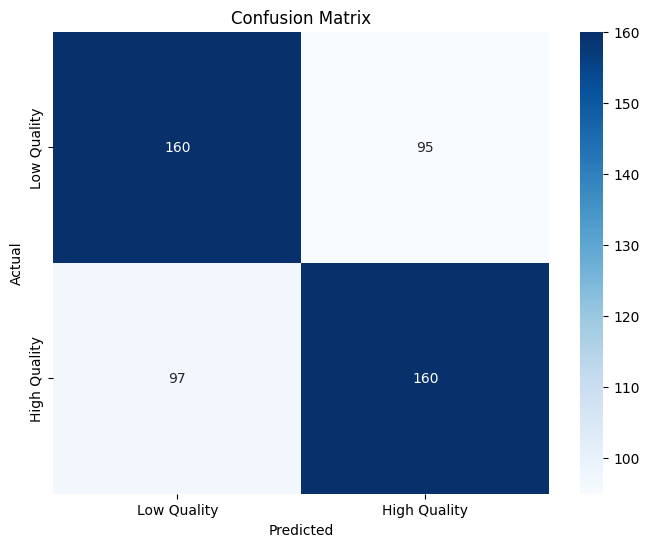

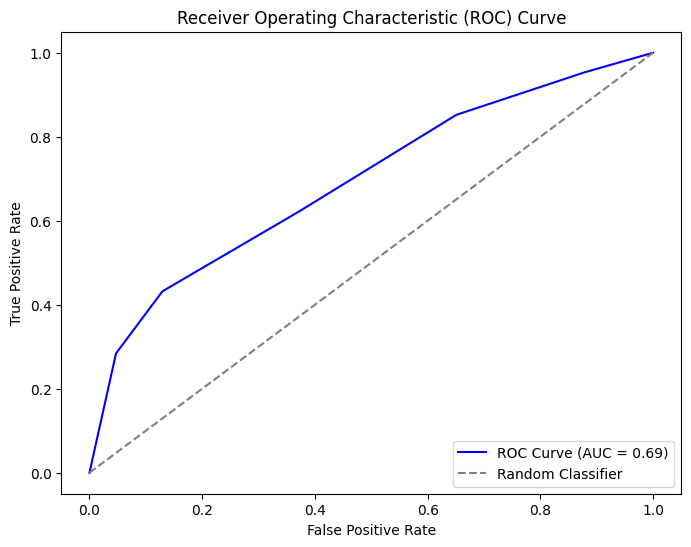

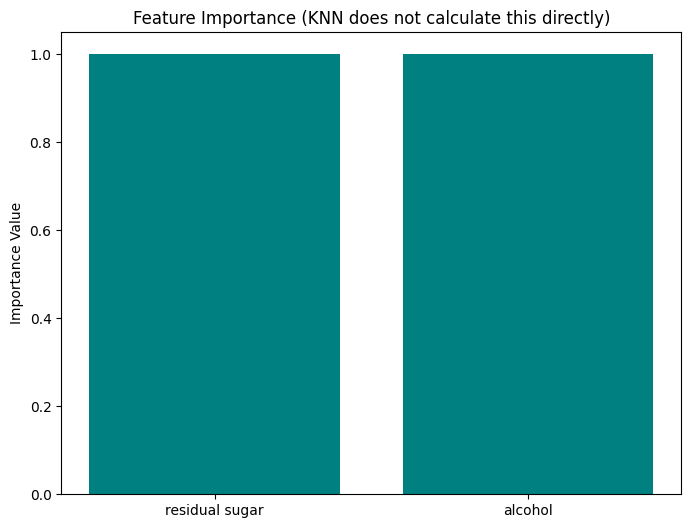

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    roc_curve,
    auc,
)
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def knn(wine_set):
    # Recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # Split into training and testing sets
    predictors = wine_set[["residual sugar", "alcohol"]]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(
        predictors, targets, test_size=0.4, random_state=42
    )

    # Build model on training data
    classifier = KNeighborsClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    prob_predictions = classifier.predict_proba(pred_test)[:, 1]  # Probabilities for ROC curve

    # Compute metrics
    accuracy = accuracy_score(tar_test, predictions)
    precision = precision_score(tar_test, predictions)
    recall = recall_score(tar_test, predictions)
    f1 = f1_score(tar_test, predictions)
    rmse = mean_squared_error(predictions, tar_test) ** 0.5

    # Convert metrics into a DataFrame with index
    metrics_df = pd.DataFrame(
        {
            "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "RMSE"],
            "Value": [accuracy, precision, recall, f1, rmse],
        }
    )
    metrics_df.index = range(len(metrics_df))  # Add indexes 0, 1, 2, ...

    # Convert DataFrame to Tabular Format
    tabular_format = tabulate(metrics_df, headers="keys", tablefmt="pretty", showindex=True)
    print("\nPerformance Metrics Table:\n")
    print(tabular_format)

    # Confusion Matrix
    cm = confusion_matrix(tar_test, predictions)

    # Confusion Matrix Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Low Quality', 'High Quality'],
        yticklabels=['Low Quality', 'High Quality'],
    )
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(tar_test, prob_predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Feature Importance Visualization (for KNN, feature importance is not directly available)
    feature_names = predictors.columns
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, [1, 1], color='teal')  # Uniform importance as placeholder
    plt.title('Feature Importance (KNN does not calculate this directly)')
    plt.ylabel('Importance Value')
    plt.show()

print('----------------KNN------------------------')
knn(wine_train_df)


## Naive Bayes

----------------Naive Bayes------------------------


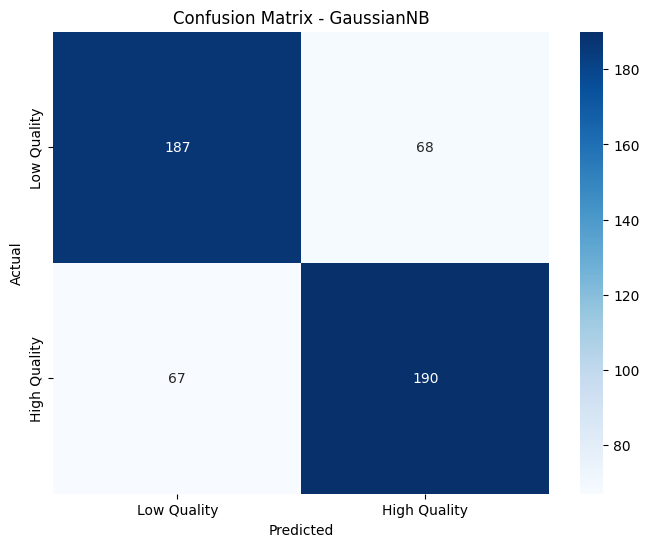

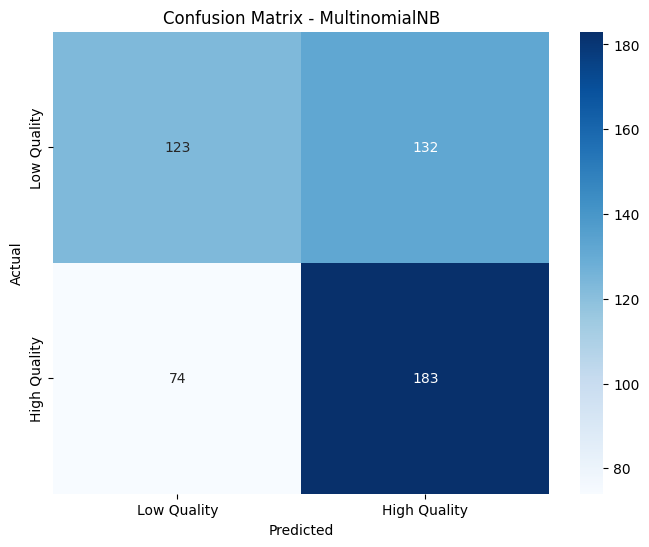

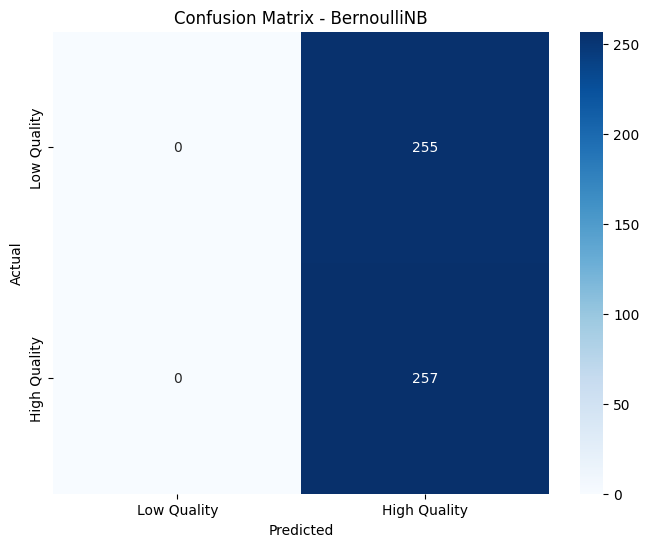


Performance Metrics Table:

+---+---------------+-------------+--------------------+--------------------+--------------------+--------------------+
|   |     Model     |  Accuracy   |     Precision      |       Recall       |      F1 Score      |        RMSE        |
+---+---------------+-------------+--------------------+--------------------+--------------------+--------------------+
| 0 |  GaussianNB   | 0.736328125 | 0.7364341085271318 | 0.7392996108949417 | 0.7378640776699029 | 0.5134898976610932 |
| 1 | MultinomialNB | 0.59765625  | 0.580952380952381  | 0.7120622568093385 | 0.6398601398601399 | 0.6343057228182637 |
| 2 |  BernoulliNB  | 0.501953125 |    0.501953125     |        1.0         | 0.6684005201560468 | 0.7057243619147634 |
+---+---------------+-------------+--------------------+--------------------+--------------------+--------------------+


In [35]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
)
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def naive(wine_set):
    # Recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # Split into training and testing sets
    predictors = wine_set[
        [
            'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol'
        ]
    ]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(
        predictors, targets, test_size=0.4, random_state=42
    )

    # Dictionary to store results for each classifier
    classifiers = {
        "GaussianNB": GaussianNB(),
        "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(),
    }
    results = []

    # Evaluate each classifier
    for name, classifier in classifiers.items():
        classifier.fit(pred_train, tar_train)
        predictions = classifier.predict(pred_test)

        # Compute metrics
        accuracy = accuracy_score(tar_test, predictions)
        precision = precision_score(tar_test, predictions)
        recall = recall_score(tar_test, predictions)
        f1 = f1_score(tar_test, predictions)
        rmse = mean_squared_error(predictions, tar_test) ** 0.5

        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "RMSE": rmse,
        })

        # Confusion Matrix
        cm = confusion_matrix(tar_test, predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality']
        )
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    # Convert results to DataFrame and tabular format
    results_df = pd.DataFrame(results)
    results_df.index = range(len(results_df))  # Add indexes 0, 1, 2, ...
    tabular_format = tabulate(results_df, headers="keys", tablefmt="pretty", showindex=True)

    print("\nPerformance Metrics Table:\n")
    print(tabular_format)

print('----------------Naive Bayes------------------------')
naive(wine_train_df)


## Random Forest

----------------Random Forests------------------------

Performance Metrics Table:

+-------+-----------+--------------------+
| Index |  Metric   |       Value        |
+-------+-----------+--------------------+
|   0   | Accuracy  |     0.79296875     |
|   1   | Precision | 0.8007968127490039 |
|   2   |  Recall   | 0.7821011673151751 |
|   3   | F1 Score  | 0.7913385826771654 |
|   4   |   RMSE    | 0.4550068680800324 |
+-------+-----------+--------------------+


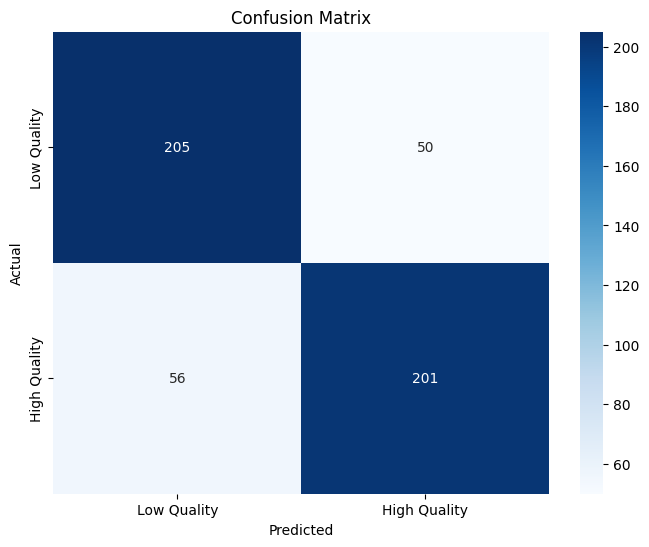

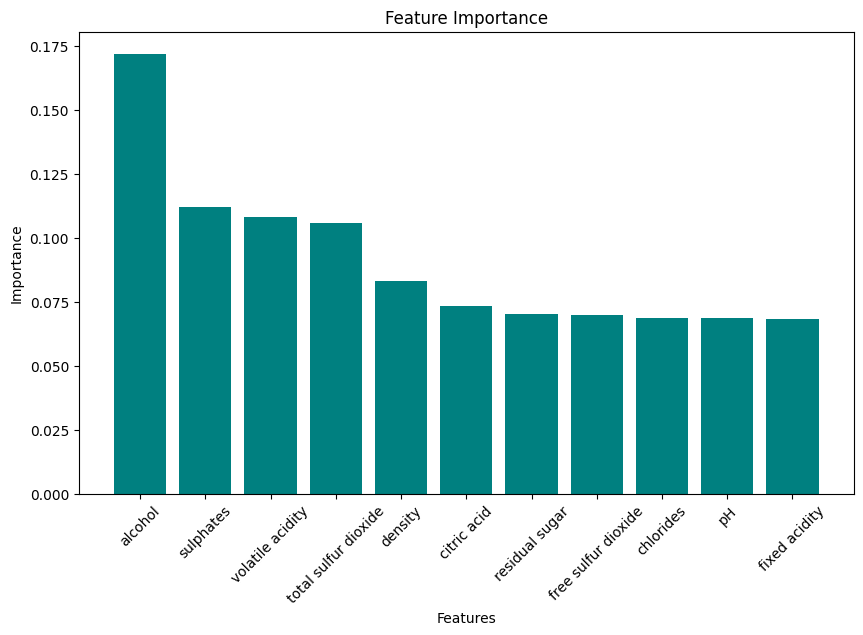


Feature Importances (Sorted):
alcohol: 0.1721
sulphates: 0.1121
volatile acidity: 0.1082
total sulfur dioxide: 0.1057
density: 0.0832
citric acid: 0.0733
residual sugar: 0.0701
free sulfur dioxide: 0.0701
chlorides: 0.0687
pH: 0.0685
fixed acidity: 0.0682


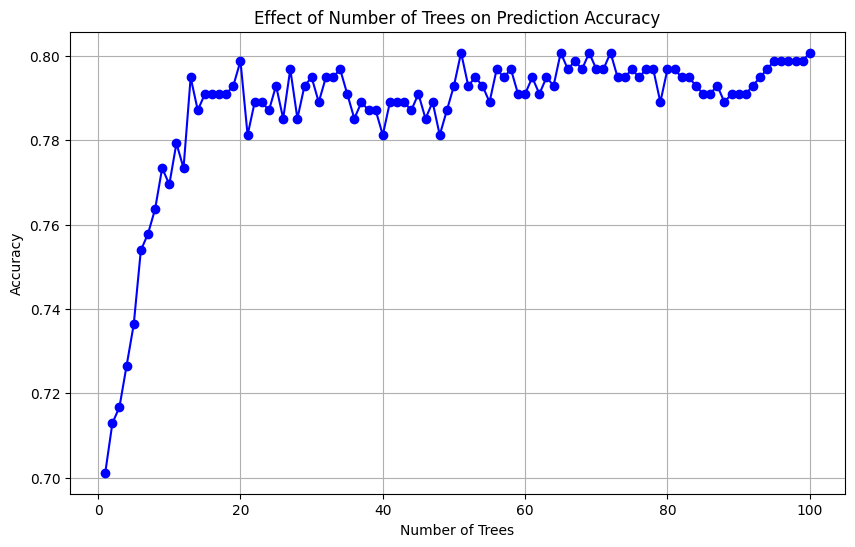


Accuracy for Number of Trees (First 10):
Trees=1: Accuracy=0.7012
Trees=2: Accuracy=0.7129
Trees=3: Accuracy=0.7168
Trees=4: Accuracy=0.7266
Trees=5: Accuracy=0.7363
Trees=6: Accuracy=0.7539
Trees=7: Accuracy=0.7578
Trees=8: Accuracy=0.7637
Trees=9: Accuracy=0.7734
Trees=10: Accuracy=0.7695


In [37]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import pandas as pd

def random_forests(wine_set):
    # Recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # Split into training and testing sets
    predictors = wine_set[
        [
            'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol'
        ]
    ]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(
        predictors, targets, test_size=0.4, random_state=42
    )

    # Build model on training data
    classifier = RandomForestClassifier(n_estimators=25, random_state=42)
    classifier = classifier.fit(pred_train, tar_train)
    predictions = classifier.predict(pred_test)

    # Calculate metrics
    accuracy = accuracy_score(tar_test, predictions)
    precision = precision_score(tar_test, predictions)
    recall = recall_score(tar_test, predictions)
    f1 = f1_score(tar_test, predictions)
    mse = mean_squared_error(tar_test, predictions)
    rmse = mse ** 0.5

    # Metrics Table
    metrics = [
        {"Index": 0, "Metric": "Accuracy", "Value": accuracy},
        {"Index": 1, "Metric": "Precision", "Value": precision},
        {"Index": 2, "Metric": "Recall", "Value": recall},
        {"Index": 3, "Metric": "F1 Score", "Value": f1},
        {"Index": 4, "Metric": "RMSE", "Value": rmse},
    ]
    metrics_df = pd.DataFrame(metrics)
    tabular_format = tabulate(metrics_df, headers="keys", tablefmt="pretty", showindex=False)

    print("\nPerformance Metrics Table:\n")
    print(tabular_format)

    # Confusion Matrix
    cm = confusion_matrix(tar_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Low Quality', 'High Quality'],
        yticklabels=['Low Quality', 'High Quality']
    )
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Feature Importance Visualization
    model = ExtraTreesClassifier(random_state=42)
    model.fit(pred_train, tar_train)

    feature_importances = model.feature_importances_
    feature_importance_dict = {
        predictors.columns[i]: feature_importances[i] for i in range(len(predictors.columns))
    }
    sorted_features = sorted(feature_importance_dict.items(), key=operator.itemgetter(1), reverse=True)

    plt.figure(figsize=(10, 6))
    plt.bar(*zip(*sorted_features), color='teal')
    plt.title('Feature Importance')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.xticks(rotation=45)
    plt.show()

    print("\nFeature Importances (Sorted):")
    for feature, importance in sorted_features:
        print(f"{feature}: {importance:.4f}")

    # Effect of Number of Trees on Accuracy
    n_trees = 100
    accuracies = []

    for i in range(1, n_trees + 1):
        temp_classifier = RandomForestClassifier(n_estimators=i, random_state=42)
        temp_classifier.fit(pred_train, tar_train)
        temp_predictions = temp_classifier.predict(pred_test)
        accuracies.append(accuracy_score(tar_test, temp_predictions))

    # Plot Accuracy vs. Number of Trees
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_trees + 1), accuracies, marker='o', linestyle='-', color='blue')
    plt.title('Effect of Number of Trees on Prediction Accuracy')
    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.show()

    print("\nAccuracy for Number of Trees (First 10):")
    for i in range(10):
        print(f"Trees={i + 1}: Accuracy={accuracies[i]:.4f}")

print('----------------Random Forests------------------------')
random_forests(wine_train_df)


## Linear Regression

*Linear regression isn't suitable for predicting wine quality because the target variable is ordinal and discrete, not continuous. It assumes linear relationships between predictors and the target, which may not hold for wine quality.*

----------------Basic Linear------------------------

Performance Metrics Table:

+-------+-----------+--------------------+
| Index |  Metric   |       Value        |
+-------+-----------+--------------------+
|   0   | Accuracy  |       0.875        |
|   1   | Precision |        0.0         |
|   2   |  Recall   |        0.0         |
|   3   | F1 Score  |        0.0         |
|   4   |   RMSE    | 0.3535533905932738 |
+-------+-----------+--------------------+


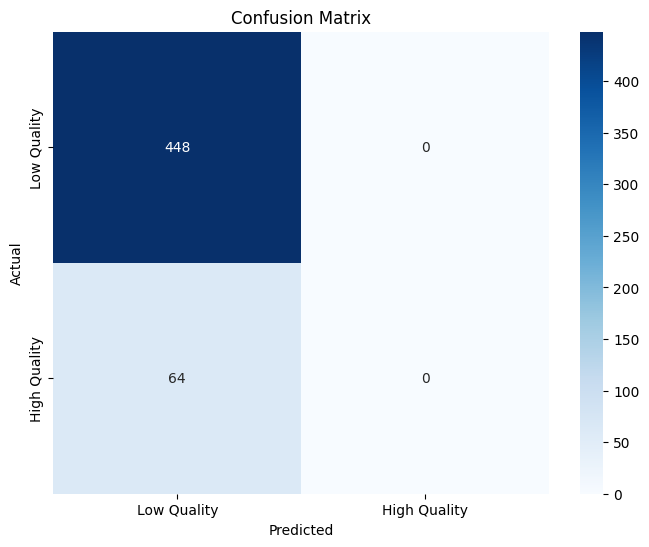

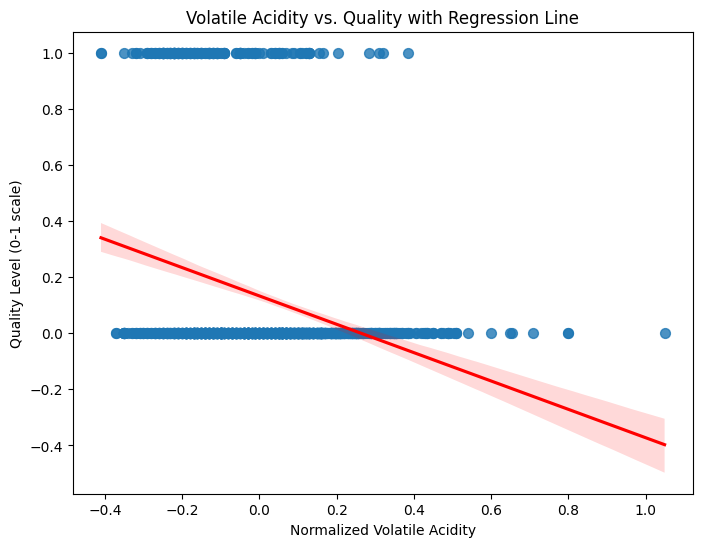

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from tabulate import tabulate

def basic_linear(wine_set):
    # Recode quality into 2 groups: 0:{3,4,5,6}, 1:{7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # Prepare predictors and target variables
    predictors = wine_set[["volatile acidity"]]
    targets = wine_set["quality_c"]

    # Split data into training and testing sets
    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=0.4, random_state=42)

    # Build Linear Regression model
    model = LinearRegression()
    model.fit(pred_train, tar_train)

    predictions = model.predict(pred_test)
    predictions = [round(x) for x in predictions]  # Converting predictions to 0 or 1 for classification

    # Calculate metrics
    accuracy = accuracy_score(tar_test, predictions)
    precision = precision_score(tar_test, predictions)
    recall = recall_score(tar_test, predictions)
    f1 = f1_score(tar_test, predictions)
    mse = mean_squared_error(tar_test, predictions)
    rmse = mse ** 0.5

    # Metrics Table
    metrics = [
        {"Index": 0, "Metric": "Accuracy", "Value": accuracy},
        {"Index": 1, "Metric": "Precision", "Value": precision},
        {"Index": 2, "Metric": "Recall", "Value": recall},
        {"Index": 3, "Metric": "F1 Score", "Value": f1},
        {"Index": 4, "Metric": "RMSE", "Value": rmse},
    ]
    metrics_df = pd.DataFrame(metrics)
    tabular_format = tabulate(metrics_df, headers="keys", tablefmt="pretty", showindex=False)

    print("\nPerformance Metrics Table:\n")
    print(tabular_format)

    # Confusion Matrix
    cm = confusion_matrix(tar_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Low Quality', 'High Quality'],
        yticklabels=['Low Quality', 'High Quality']
    )
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plotting the regression line on the normalized data
    plt.figure(figsize=(8, 6))
    sns.regplot(x="volatile acidity", y="quality_c", data=wine_set, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.xlabel("Normalized Volatile Acidity")
    plt.ylabel("Quality Level (0-1 scale)")
    plt.title("Volatile Acidity vs. Quality with Regression Line")
    plt.show()

print('----------------Basic Linear------------------------')
basic_linear(wine_train_df)
